## Import the necessary libraries

In [293]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [294]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [295]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

## First look at its main features (head, shape, info)

In [296]:
customer_df.shape

(9134, 24)

In [297]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [298]:
# Count number of zeros in all columns of Dataframe

for column_name in customer_df.columns:
    column = customer_df[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name.upper(), ' is : ', count)

Count of zeros in column  CUSTOMER  is :  0
Count of zeros in column  STATE  is :  0
Count of zeros in column  CUSTOMER LIFETIME VALUE  is :  0
Count of zeros in column  RESPONSE  is :  0
Count of zeros in column  COVERAGE  is :  0
Count of zeros in column  EDUCATION  is :  0
Count of zeros in column  EFFECTIVE TO DATE  is :  0
Count of zeros in column  EMPLOYMENTSTATUS  is :  0
Count of zeros in column  GENDER  is :  0
Count of zeros in column  INCOME  is :  2317
Count of zeros in column  LOCATION CODE  is :  0
Count of zeros in column  MARITAL STATUS  is :  0
Count of zeros in column  MONTHLY PREMIUM AUTO  is :  0
Count of zeros in column  MONTHS SINCE LAST CLAIM  is :  314
Count of zeros in column  MONTHS SINCE POLICY INCEPTION  is :  83
Count of zeros in column  NUMBER OF OPEN COMPLAINTS  is :  7252
Count of zeros in column  NUMBER OF POLICIES  is :  0
Count of zeros in column  POLICY TYPE  is :  0
Count of zeros in column  POLICY  is :  0
Count of zeros in column  RENEW OFFER TYPE

## Rename the columns so they follow the PE8 (snake case)

In [299]:
customer_df.columns = map(str.lower,customer_df.columns)
customer_df.columns = customer_df.columns.str.replace(' ','_')

In [300]:
# Checking
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## Change effective to date column to datetime format

In [301]:
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])

In [302]:
customer_df['effective_to_date'] ## Checking if the format changed

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

## Check NaN values per column

In [303]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

##  Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [304]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [305]:
customer_df['income'] = customer_df['income'].astype('float64')   ## 'Income' can be considered as continious in this case

In [306]:
numerical = customer_df.select_dtypes(include = ['int64','datetime64','float64'])

def split_numerical_discrete(df): 
    discrete = []
    continious = []
    for column in df:
        if df[column].dtype == np.int64:
            discrete.append(column)
        else:
            continious.append(column)
    return {
        'discrete_columns': discrete, 
        'continuous_columns':continious
    }
    

In [307]:
split_numerical_discrete(numerical)

{'discrete_columns': ['monthly_premium_auto',
  'months_since_last_claim',
  'months_since_policy_inception',
  'number_of_open_complaints',
  'number_of_policies'],
 'continuous_columns': ['customer_lifetime_value',
  'effective_to_date',
  'income',
  'total_claim_amount']}

In [308]:
numerical_columns = split_numerical_discrete(numerical)
discrete = numerical_columns['discrete_columns']
continuous = numerical_columns['continuous_columns']

In [309]:
customer_df[discrete]

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


In [310]:
customer_df[continuous]

,customer_lifetime_value,effective_to_date,income,total_claim_amount
0,2763.519279,2011-02-24,56274.0,384.811147
1,6979.535903,2011-01-31,0.0,1131.464935
2,12887.431650,2011-02-19,48767.0,566.472247
3,7645.861827,2011-01-20,0.0,529.881344
4,2813.692575,2011-02-03,43836.0,138.130879
...,...,...,...,...
9129,23405.987980,2011-02-10,71941.0,198.234764
9130,3096.511217,2011-02-12,21604.0,379.200000
9131,8163.890428,2011-02-06,0.0,790.784983
9132,7524.442436,2011-02-03,21941.0,691.200000


## Get categorical features.For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get     



In [311]:
categorical = list(customer_df.select_dtypes(include = ['object']).columns)
categorical.remove('customer')

In [312]:
for column in categorical:
    if column!='customer':
        print('*********', column.upper(), '***************')
        print(customer_df[column].value_counts())
        print('---------------------------------------------')
    
        

********* STATE ***************
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
---------------------------------------------
********* RESPONSE ***************
No     7826
Yes    1308
Name: response, dtype: int64
---------------------------------------------
********* COVERAGE ***************
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
---------------------------------------------
********* EDUCATION ***************
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
---------------------------------------------
********* EMPLOYMENTSTATUS ***************
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
---------------------------------------------
********* GEN

#### All 'object' types look like categorical

## What should we do with the customer_id column?

In [313]:
customer_df = customer_df.drop(['customer'],axis =1)  ## First i set "customer" as index,then i realized that i have 
# problems when i tried to concatenate numerical and categorical columns.So i will drop this column

## Plot a correlation matrix, what can you see?

In [314]:
corr_mat = customer_df.corr(method='spearman')
corr_mat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
monthly_premium_auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
months_since_last_claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
months_since_policy_inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
number_of_open_complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
number_of_policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
total_claim_amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


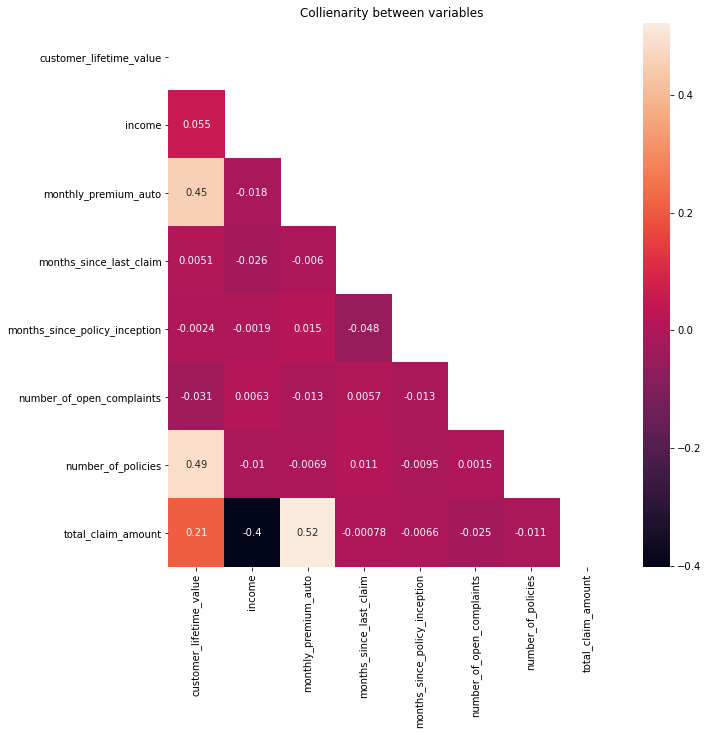

In [315]:
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 10)) 
ax = sns.heatmap(corr_mat, mask=mask, annot=True) 
ax.set_title('Collienarity between variables') 
plt.show()

## Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data)

In [316]:
def plot_discrete(df):
    for column in df:
        sns.histplot(df[column])
        plt.show()

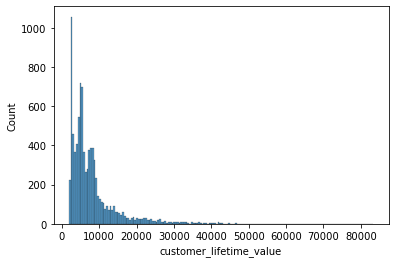

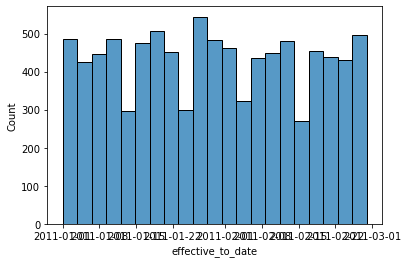

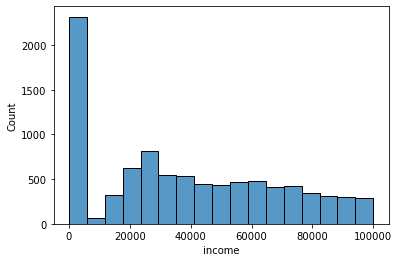

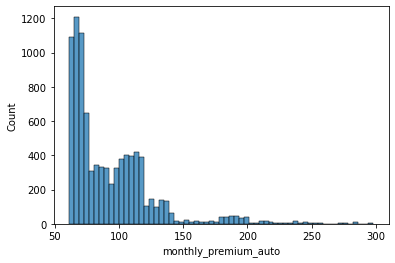

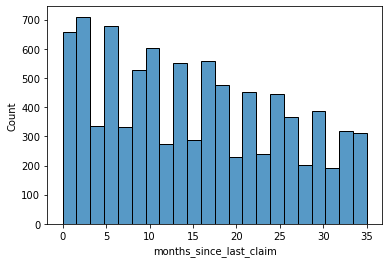

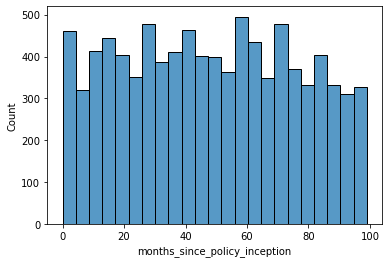

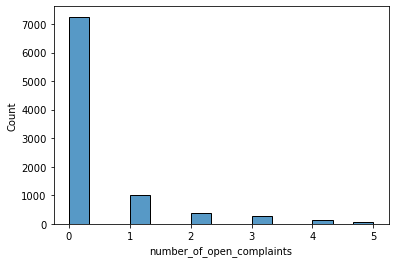

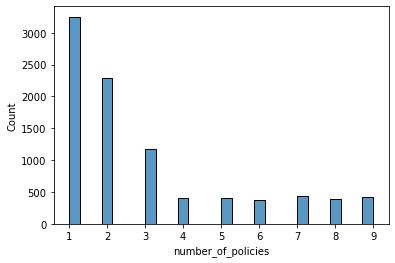

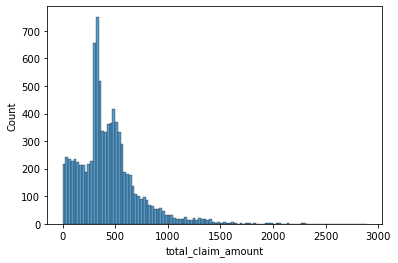

In [317]:
plot_discrete(numerical)

## What can you see in the plots?

#### "Income" and "Number of Open Complaints" columns contain large amount of zeros("Income" more than 2500, "Number of Open Complaints" more than 7000).I dont know how to deal with this zeros.Maybe we could split this columns  by zeros and non-zeros."Months since last claim","Months since policy inception",'Effective to date',"Number of  policies" seem like normal distribution."Customer Lifetime Value" and "Monthly Premium Auto"columns are highly skewed 

In [318]:
def plot_outliers(df):
    for column in df:
        sns.boxplot(df[column])
        plt.show()

In [319]:
columns_with_outliers = ['customer_lifetime_value','monthly_premium_auto']

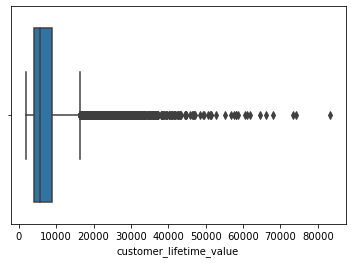

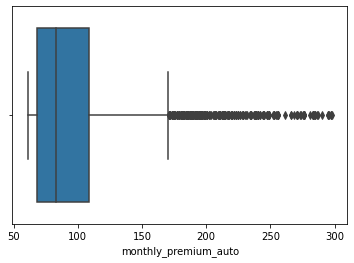

In [320]:
plot_outliers(customer_df[columns_with_outliers])

## Have you found outliers? If you have, what should we do with them?

In [321]:
#I decided to remove outliers

def remove_outliers(df, in_columns, threshold=3):
    for column in in_columns:
        upper = np.percentile(df[column],75)
        lower = np.percentile(df[column],25)
        iqr = upper - lower
        upper_limit = upper + threshold * iqr
        lower_limit = lower - threshold * iqr
        df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [322]:
customer_df_cleaned = remove_outliers(customer_df, 
                     in_columns=columns_with_outliers, 
                     threshold = 3
                    )

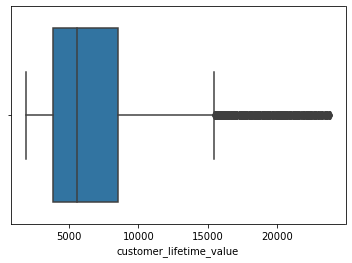

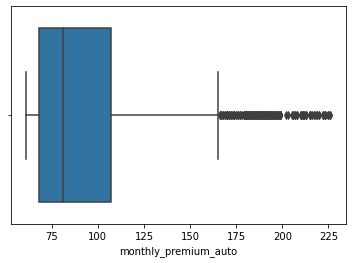

In [323]:
plot_outliers(customer_df_cleaned[columns_with_outliers])

## Plot all the categorical variables with the proper plot. What can you see?

STATE


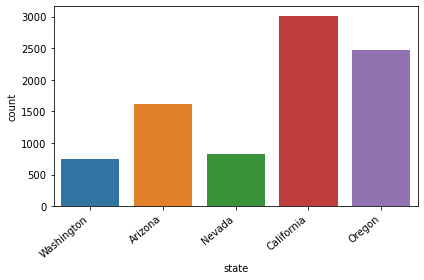

RESPONSE


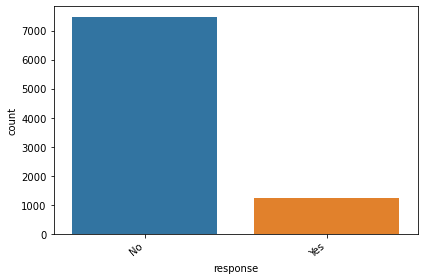

COVERAGE


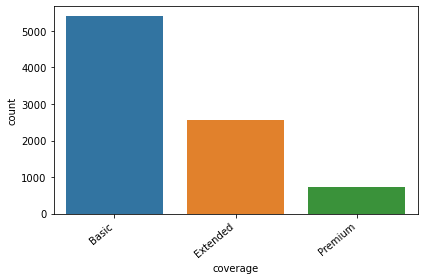

EDUCATION


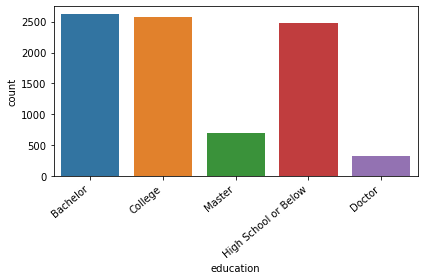

EMPLOYMENTSTATUS


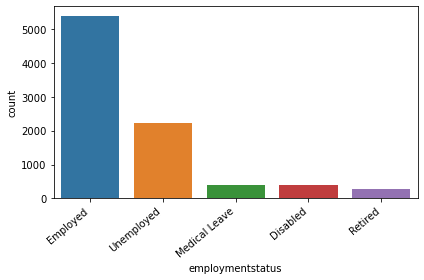

GENDER


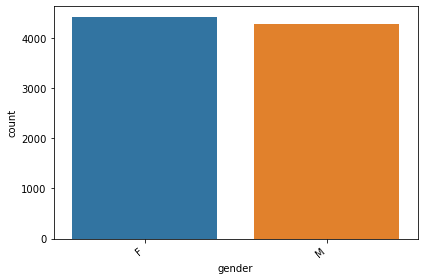

LOCATION_CODE


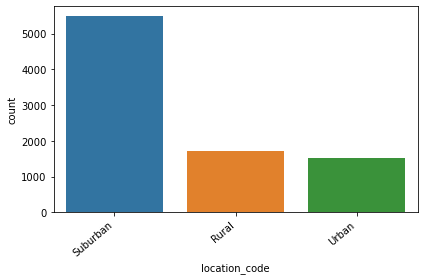

MARITAL_STATUS


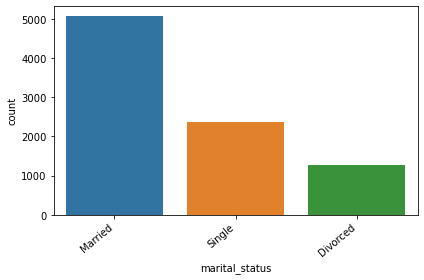

POLICY_TYPE


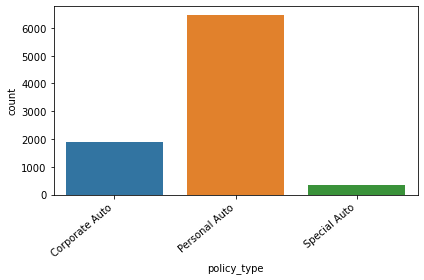

POLICY


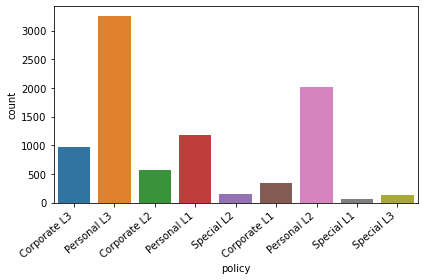

RENEW_OFFER_TYPE


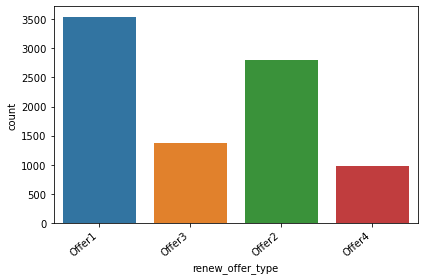

SALES_CHANNEL


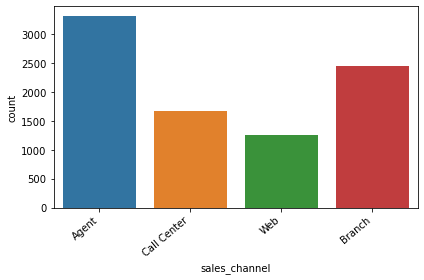

VEHICLE_CLASS


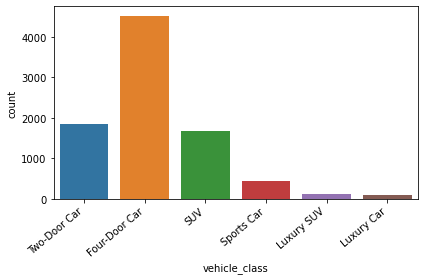

VEHICLE_SIZE


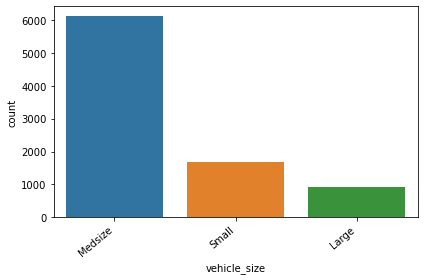

In [324]:
for column in categorical:
    if column == 'effective_to_date':  ##we will plot this column in the next exercise
        continue
    ax = sns.countplot(x = customer_df_cleaned[column], data=customer_df_cleaned)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    print(column.upper())
    plt.tight_layout()
    plt.show()

## There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [325]:
for column in categorical:
    if column!='effective_to_date':
        print('*********', column.upper(), '***************')
        print(customer_df_cleaned[column].value_counts())
        print('---------------------------------------------')

********* STATE ***************
California    3010
Oregon        2478
Arizona       1624
Nevada         833
Washington     752
Name: state, dtype: int64
---------------------------------------------
********* RESPONSE ***************
No     7461
Yes    1236
Name: response, dtype: int64
---------------------------------------------
********* COVERAGE ***************
Basic       5398
Extended    2566
Premium      733
Name: coverage, dtype: int64
---------------------------------------------
********* EDUCATION ***************
Bachelor                2616
College                 2577
High School or Below    2474
Master                   704
Doctor                   326
Name: education, dtype: int64
---------------------------------------------
********* EMPLOYMENTSTATUS ***************
Employed         5405
Unemployed       2231
Medical Leave     409
Disabled          386
Retired           266
Name: employmentstatus, dtype: int64
---------------------------------------------
********* GEN

#### For now,i dont see any redundant column in data

## Plot time variable. Can you extract something from it?


In [326]:
customer_df_cleaned['effective_to_date'] = pd.to_datetime(customer_df_cleaned['effective_to_date'], errors='coerce')
customer_df_cleaned['effective_to_date'].head(10)

0    2011-02-24
1    2011-01-31
2    2011-02-19
3    2011-01-20
4    2011-02-03
5    2011-01-25
6    2011-02-24
7    2011-01-18
9    2011-02-17
10   2011-02-21
Name: effective_to_date, dtype: datetime64[ns]

<AxesSubplot:ylabel='effective_to_date'>

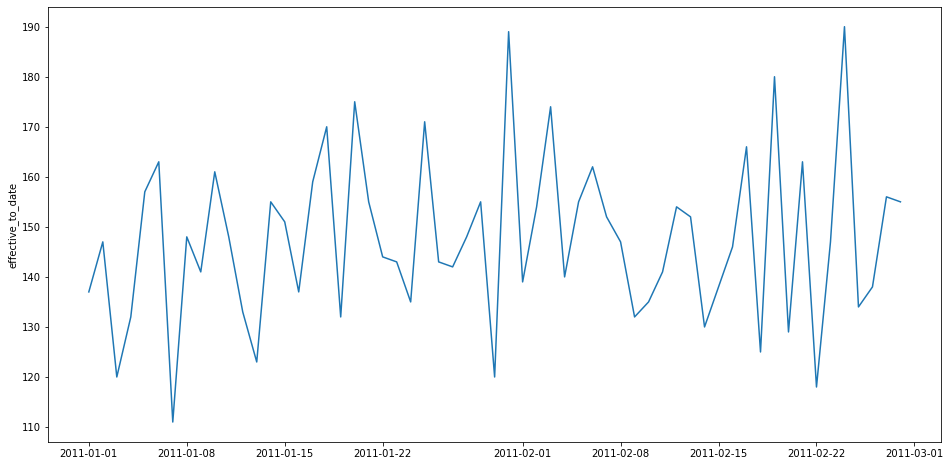

In [327]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=customer_df_cleaned['effective_to_date'].unique(), y = customer_df_cleaned['effective_to_date'].value_counts())

In [328]:
# I decided to extract week from the effective_to_date column,as all contracts in dataset begin in 2011

customer_df_cleaned['contract_weeks_2011'] = customer_df_cleaned['effective_to_date'].dt.week
customer_df_cleaned = customer_df_cleaned.drop('effective_to_date',axis = 1)
customer_df_cleaned['contract_weeks_2011'].unique()

array([ 8,  5,  7,  3,  4,  1,  2,  9,  6, 52])

## Normalize the continuous variables. You can use any one method you want

In [329]:
# 'Total Claim Amount' is going to be our target,so we dont scale this column

continous_columns = ['customer_lifetime_value','income']
discrete_columns = ['monthly_premium_auto','months_since_last_claim','months_since_policy_inception',
               'number_of_open_complaints','number_of_policies','contract_weeks_2011']

In [330]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(customer_df_cleaned[continous_columns])
customer_df_cleaned[continous_columns] = pd.DataFrame(transformer.transform(customer_df_cleaned[continous_columns]), index=customer_df_cleaned.index)

# Encode the categorical variables

In [331]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
ordinal_cols = ['education', 'coverage','employmentstatus','vehicle_size','location_code', 'response', 'gender']
customer_df_cleaned[ordinal_cols] = pd.DataFrame(oe.fit_transform(customer_df_cleaned[ordinal_cols]).astype(int), 
                                                 index=customer_df_cleaned.index)

## One Hot Encoding


In [332]:
onehot_cols = ['state','marital_status','policy_type','sales_channel','policy','vehicle_class', 'renew_offer_type']

In [333]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

df_for_ohe = customer_df_cleaned[onehot_cols]
customer_df_cleaned.drop(onehot_cols, axis=1, inplace=True)

enc = preprocessing.OneHotEncoder()
enc.fit(df_for_ohe)

from functools import reduce
one_hot_cols_encoded = reduce(lambda x, y: list(x) + list(y), enc.categories_)

customer_df_cleaned[one_hot_cols_encoded] = pd.DataFrame(enc.transform(df_for_ohe).toarray(), 
                                                         index=customer_df_cleaned.index)

## Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding

In [334]:
# All columns are in numerical

## In this final lab, we will model our data. Import sklearn train_test_split and separate the data.


In [335]:
y = customer_df_cleaned[['total_claim_amount']]
X = customer_df_cleaned.drop('total_claim_amount', axis=1)

In [336]:
print(y.shape)
print(X.shape)

(8697, 1)
(8697, 49)


In [337]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [338]:
transformer = Normalizer().fit(X) 
X_normalized = transformer.transform(X)

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=10)


## Try a simple linear regression with all the data to see whether we are getting good results

In [340]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train, y_train)

In [341]:
lm_predictions = lm_model.predict(X_test)

In [342]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 135.01
The mean squared error of the model in the test set is: 32830.83
The root mean squared error of the model in the test set is: 181.19
The R2 of the model in the test set is: 0.52


## Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [343]:
def models(data, target, model, k = 3, test_size=0.2, multiclass = 'multinomial'):
    # X Y split
    
    X = customer_df_cleaned.drop('total_claim_amount', axis=1)
    y = customer_df_cleaned[['total_claim_amount']]
    
    # Train Test split
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=100)
    
    # linear model
    if model == 'Linear_Regression':
        from sklearn import linear_model
        lm = linear_model.LinearRegression()
        model =lm.fit(X_train,y_train)
        predictions  = lm.predict(X_test)
        predictions_df = pd.DataFrame(predictions, columns=[y.columns])
        
    # K NeighborsRegressor
    elif model == 'KNN':
        from sklearn.neighbors import KNeighborsRegressor

        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_df = pd.DataFrame(predictions, columns=[y.columns])
        
    # Logistic model
    elif model == 'Logistic':
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import cohen_kappa_score
        model = LogisticRegression(random_state=0, solver='lbfgs', multi_class=multiclass).fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_df = pd.DataFrame(model.predict(X_test))
        
        print("The accuracy of the model in the TEST set is: ", round(model.score(X_test, y_test),2))
        print("The kappa of the model is: ", cohen_kappa_score(y,model.predict(X)))
        
    else:
        print('something went wrong')
        
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)
    
    results_error_matrix=[MAE,MSE,RMSE,R2]


    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    
    return predictions, predictions_df, model, results_error_matrix 
        
        

## Use the function to check LinearRegressor and KNeighborsRegressor.


In [344]:
#Checking Linear Model

predictions, predictions_df, model, results_error_matrix = models(customer_df_cleaned,'total_claim_amount',
                                                                  'Linear_Regression')

The mean absolute error of the model in the test set is: 126.35
The mean squared error of the model in the test set is: 28524.89
The root mean squared error of the model in the test set is: 168.89
The R2 of the model in the test set is: 0.59


In [345]:
predictions_df

,total_claim_amount
0,564.757630
1,785.040536
2,526.669451
3,246.024745
4,527.151325
...,...
1735,721.522467
1736,506.837642
1737,349.295862
1738,248.035122


In [346]:
# Checking KNN 

predictions, predictions_df, model, results_error_matrix = models(customer_df_cleaned,'total_claim_amount',
                                                                  'KNN')


The mean absolute error of the model in the test set is: 148.66
The mean squared error of the model in the test set is: 46947.77
The root mean squared error of the model in the test set is: 216.67
The R2 of the model in the test set is: 0.33


In [130]:
predictions_df

,total_claim_amount
0,416.906660
1,534.347491
2,369.818708
3,227.454064
4,317.481409
...,...
1735,776.077192
1736,484.980230
1737,489.600000
1738,112.660916
